In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#To load data set
df=pd.read_csv('iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df["species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [4]:
c=df["species"].value_counts()
print(c)


Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: species, dtype: int64


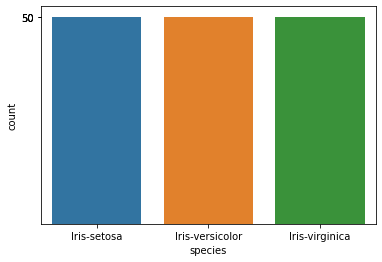

In [5]:
#visualisation 
sns.countplot(data=df,x="species")
c=df["species"].value_counts()
plt.yticks(c)
plt.show()

In [6]:
df.shape
#check null values
df.isnull().sum()
#check datatype
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

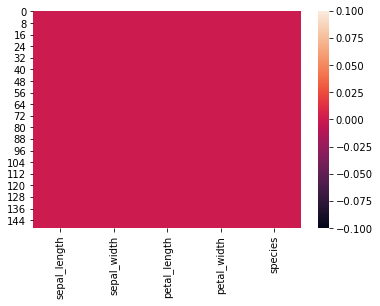

In [7]:
#check null values
sns.heatmap(df.isnull())
plt.show()


In [8]:
#check datatype
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [9]:
#apply label encoder on species o/p column  permanently
from sklearn.preprocessing import LabelEncoder
#create object of label encoder
le=LabelEncoder()
df["species"]=le.fit_transform(df["species"])

In [10]:
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


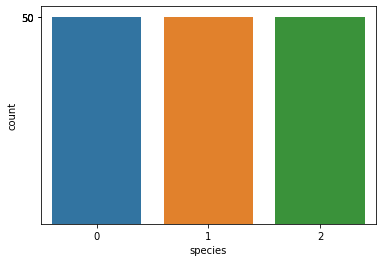

In [11]:
#visualisation 
sns.countplot(data=df,x="species")
c=df["species"].value_counts()
plt.yticks(c)
plt.show()

In [12]:
#separate input and output from dataset df
X=df.drop("species",axis=1)
Y=df["species"]

In [13]:
X.head()


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [14]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int32

In [15]:
from sklearn.model_selection import train_test_split


In [16]:
#train_test_split()
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [17]:
#create a function
def create_model(model):
    model.fit(X_train,Y_train) #train the model
    Y_pred=model.predict(X_test) #test the model
    print(classification_report(Y_test,Y_pred))
    print("confusion_matrix")
    print(confusion_matrix(Y_test,Y_pred))
    return model


In [18]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [19]:
#BaseLine Model :  LogisticRegression
#first call LogisticRegression class
from sklearn.linear_model import LogisticRegression

In [20]:
#Create object of LogisticRegression class
lr=LogisticRegression()

In [21]:
#call function
lr=create_model(lr)
#f1-score=2*a*b/a+b
#a=precision b=recall


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.94      0.97        18
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

confusion_matrix
[[14  0  0]
 [ 0 17  1]
 [ 0  0 13]]


In [24]:
#call decision tree classifier
from sklearn.tree import DecisionTreeClassifier

In [26]:
#Create object of decision tree classifier class
dte=DecisionTreeClassifier(max_depth=8,criterion="entropy")

In [27]:
#call function
dte=create_model(dte)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      0.94      0.94        18
           2       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45

confusion_matrix
[[14  0  0]
 [ 0 17  1]
 [ 0  1 12]]


In [28]:
#Create object of decision tree classifier class
dte=DecisionTreeClassifier(max_depth=8,criterion="gini")

In [29]:
#call function
dte=create_model(dte)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      0.94      0.94        18
           2       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45

confusion_matrix
[[14  0  0]
 [ 0 17  1]
 [ 0  1 12]]


In [30]:
#Create object of decision tree classifier class
dte=DecisionTreeClassifier(min_samples_leaf=45,criterion="entropy")

In [31]:
dte=create_model(dte)

              precision    recall  f1-score   support

           0       0.88      1.00      0.93        14
           1       0.00      0.00      0.00        18
           2       0.45      1.00      0.62        13

    accuracy                           0.60        45
   macro avg       0.44      0.67      0.52        45
weighted avg       0.40      0.60      0.47        45

confusion_matrix
[[14  0  0]
 [ 2  0 16]
 [ 0  0 13]]


In [32]:
#Create object of decision tree classifier class
dte=DecisionTreeClassifier(min_samples_leaf=45,criterion="gini")

In [33]:
dte=create_model(dte)

              precision    recall  f1-score   support

           0       0.88      1.00      0.93        14
           1       0.00      0.00      0.00        18
           2       0.45      1.00      0.62        13

    accuracy                           0.60        45
   macro avg       0.44      0.67      0.52        45
weighted avg       0.40      0.60      0.47        45

confusion_matrix
[[14  0  0]
 [ 2  0 16]
 [ 0  0 13]]


In [34]:
#call support vector machine
from sklearn.svm import LinearSVC

In [35]:
#Create object of support vector machine class
lsvc=LinearSVC(random_state=1)

In [36]:
lsvc=create_model(lsvc)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.83      0.91        18
           2       0.81      1.00      0.90        13

    accuracy                           0.93        45
   macro avg       0.94      0.94      0.94        45
weighted avg       0.95      0.93      0.93        45

confusion_matrix
[[14  0  0]
 [ 0 15  3]
 [ 0  0 13]]


In [37]:
#Create object of support vector machine class
lsvc=LinearSVC(random_state=1,C=0.05)

In [38]:
lsvc=create_model(lsvc)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.56      0.71        18
           2       0.62      1.00      0.76        13

    accuracy                           0.82        45
   macro avg       0.87      0.85      0.83        45
weighted avg       0.89      0.82      0.82        45

confusion_matrix
[[14  0  0]
 [ 0 10  8]
 [ 0  0 13]]


In [39]:
#call support vector machine for converting 2d into 3d
from sklearn.svm import SVC

In [40]:
#Create object of support vector machine class
poly_svc=SVC(random_state=1,kernel="poly")

In [41]:
poly_svc=create_model(poly_svc)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.94      0.97        18
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

confusion_matrix
[[14  0  0]
 [ 0 17  1]
 [ 0  0 13]]


In [42]:
#Create object of support vector machine class
radial_svc=SVC(random_state=1,kernel="rbf")

In [43]:
radial_svc=create_model(radial_svc)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.94      0.97        18
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

confusion_matrix
[[14  0  0]
 [ 0 17  1]
 [ 0  0 13]]


In [44]:
#call Random Forest Tree from package
from sklearn.ensemble import RandomForestClassifier 

In [55]:
#Create the object of RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=4,max_features=4,random_state=1)

In [56]:
rfc=create_model(rfc)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      0.94      0.94        18
           2       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45

confusion_matrix
[[14  0  0]
 [ 0 17  1]
 [ 0  1 12]]
